# Lab 3

In [1]:
import utils as ut
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from importlib import reload
from astropy.time import Time
import matplotlib.patches as patches

plt.rcParams.update({'font.size': 13})

%matplotlib inline
pm = "\u00B1"  # plus-minus symbol for use in uncertainties

# set to false before submission to change default cmap
DARK = True
if DARK:
    cdef = 'gray'
    cdef_r = 'gray_r'
else:
    cdef = 'gray_r'
    cdef_r = 'gray'

In [2]:
reload(ut)

<module 'utils' from '/Users/parkergeorge/UCSD/ASTR150/ASTRO150/utils.py'>

## 1. Data Reduction
### 1a. Read in Data and Headers

In [3]:
# Load in our data
files = glob.glob('Lab3_data/*')
ut.ascend_str(files, (-8,-5))
used_files = []

In [4]:
# Set a name slice for future use
name_slice = slice(-10,-5)

In [5]:
# Sorting our frames
bias_frames = files[81:]
used_files.extend(bias_frames)

Vflat_files = files[17]
used_files.append(Vflat_files)

Rflat_files = files[19:23]
used_files.extend(Rflat_files)

R16Eury = files[66:69]
used_files.extend(R16Eury)

V16Eury = files[72:75]
used_files.extend(V16Eury)

bias_frames, Vflat_files, Rflat_files, R16Eury, V16Eury

(['Lab3_data/d1354.fits',
  'Lab3_data/d1355.fits',
  'Lab3_data/d1356.fits',
  'Lab3_data/d1357.fits',
  'Lab3_data/d1358.fits',
  'Lab3_data/d1359.fits',
  'Lab3_data/d1360.fits',
  'Lab3_data/d1361.fits',
  'Lab3_data/d1362.fits',
  'Lab3_data/d1363.fits',
  'Lab3_data/d1364.fits'],
 'Lab3_data/d1017.fits',
 ['Lab3_data/d1019.fits',
  'Lab3_data/d1020.fits',
  'Lab3_data/d1021.fits',
  'Lab3_data/d1022.fits'],
 ['Lab3_data/d1066.fits', 'Lab3_data/d1067.fits', 'Lab3_data/d1068.fits'],
 ['Lab3_data/d1072.fits', 'Lab3_data/d1073.fits', 'Lab3_data/d1074.fits'])

In [6]:
# Read the Headers from our files
used_file_names = [used_file[-10:] for used_file in used_files]
headers = ['OBSTYPE', 'OBJECT', 'DATE-BEG', 'RA', 'DEC', 'RADECSYS', 'EXPTIME', 'FILTNAM', 'COVER', 'AIRMASS']
header_data = ut.load_headers_all_files(headers, used_files)
df = pd.DataFrame({h: d for h, d in zip(headers, header_data)})
df.insert(0, 'FILE NAME', used_file_names)
df['DATE-BEG'] = Time(df['DATE-BEG'].astype(str).tolist(), format='isot', scale='utc').decimalyear
df.style.format(precision=8).hide()

latex_df = df.style.to_latex()
with open('styled_df.tex', 'w') as f:
    f.write(latex_df)

print(df)

     FILE NAME OBSTYPE      OBJECT     DATE-BEG           RA         DEC  \
0   d1354.fits    DARK        Bias  2025.157480  13:56:37.26  38:18:54.9   
1   d1355.fits    DARK        Bias  2025.157481  13:57:12.58  38:18:54.2   
2   d1356.fits    DARK        Bias  2025.157482  13:57:42.72  38:18:53.8   
3   d1357.fits    DARK        Bias  2025.157483  13:58:17.91  38:18:53.2   
4   d1358.fits    DARK        Bias  2025.157484  13:58:48.17  38:18:52.6   
5   d1359.fits    DARK        Bias  2025.157485  13:59:18.30  38:18:52.1   
6   d1360.fits    DARK        Bias  2025.157486  13:59:53.50  38:18:51.5   
7   d1361.fits    DARK        Bias  2025.157487  14:00:23.75  38:18:51.0   
8   d1362.fits    DARK        Bias  2025.157488  14:00:58.95  38:18:50.4   
9   d1363.fits    DARK        Bias  2025.157489  14:01:29.09  38:18:49.9   
10  d1364.fits    DARK        Bias  2025.157490  14:02:04.28  38:18:49.3   
11  d1017.fits  OBJECT       VFlat  2025.156575  05:57:08.68  -5:10:18.4   
12  d1019.fi

### 1b. Reduce Bias and Flat frames

In [7]:
# Removing overscan & removing bad pixel columns for bias and flats
bad_cols = [255, 256]
master_bias = ut.remove_bad_cols(ut.my_bias(bias_frames), bad_cols)
Vflat_clean = ut.remove_bad_cols(ut.load_frame_overscan_remove_bias_subtract(Vflat_files, master_bias), bad_cols)
Rflat_clean = ut.remove_bad_cols(ut.my_avg(ut.load_frame_overscan_remove_bias_subtract(Rflat_files, master_bias)), bad_cols)

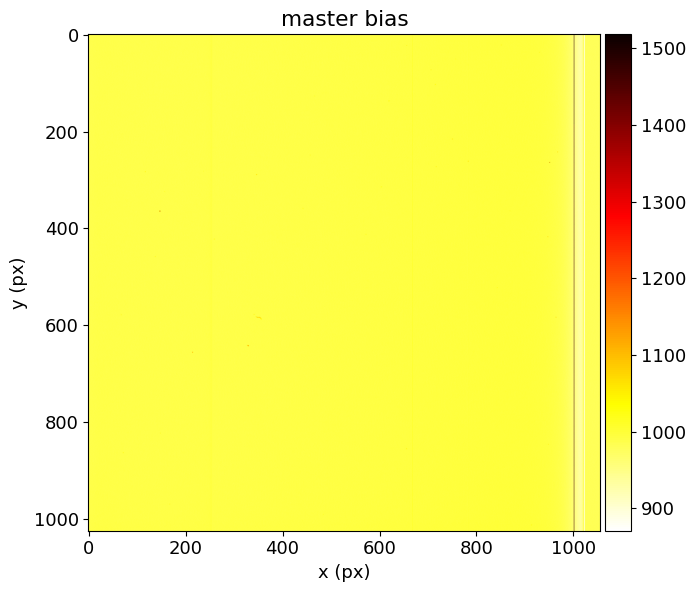

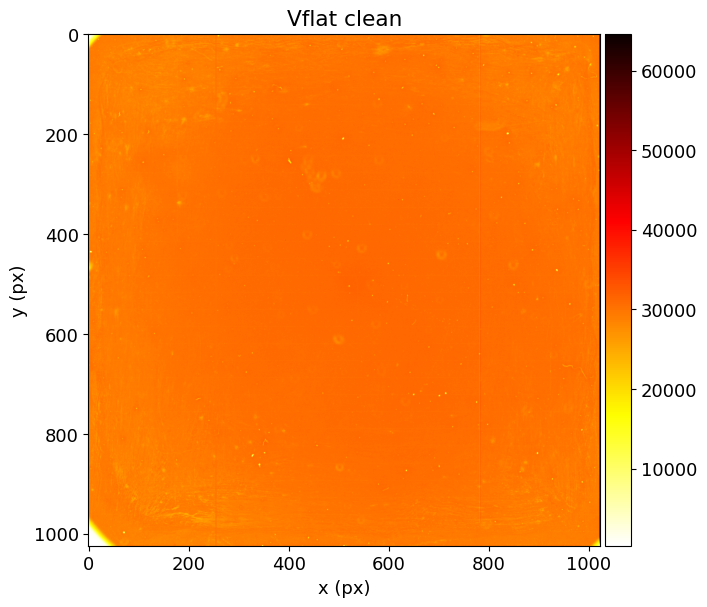

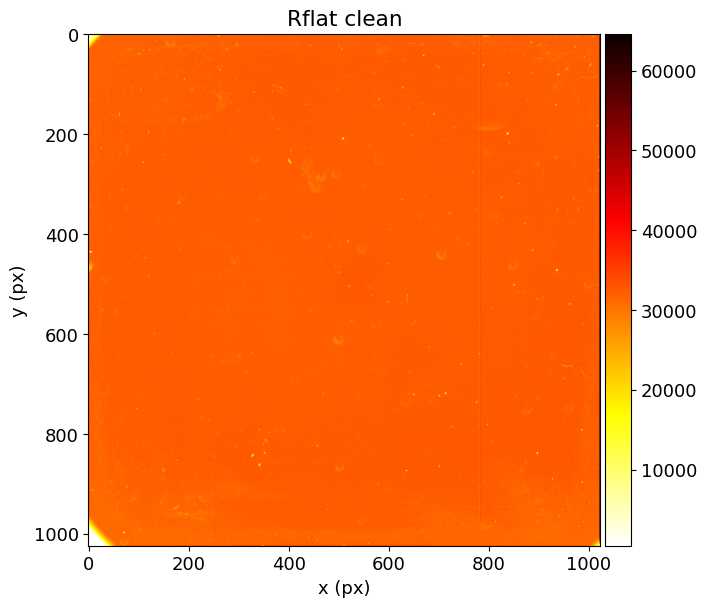

In [8]:
# Test the Bias and Flats
fig1, ax1 = plt.subplots(figsize=[7,7])
fig2, ax2 = plt.subplots(figsize=[7,7])
fig3, ax3 = plt.subplots(figsize=[7,7])
ut.plot_im(ax1, master_bias, cmap='hot_r', title='master bias')
ut.plot_im(ax2, Vflat_clean, cmap='hot_r', title='Vflat clean')
ut.plot_im(ax3, Rflat_clean, cmap='hot_r', title='Rflat clean')

### 1c. Reduce Science Frames

In [38]:
VEury = ut.remove_bad_cols(ut.my_avg(ut.load_reduced_science_frame(V16Eury, Vflat_clean, master_bias)), bad_cols)
REury = ut.remove_bad_cols(ut.my_avg(ut.load_reduced_science_frame(R16Eury, Rflat_clean, master_bias)), bad_cols)
print(REury)

[[0.02624282 0.04330489 0.04123111 ... 0.00373542 0.00286295 0.00244908]
 [0.01176935 0.01972865 0.01730199 ... 0.00267962 0.00237415 0.00198127]
 [0.01258392 0.01687976 0.01920313 ... 0.00274404 0.0023588  0.00221483]
 ...
 [0.01941786 0.03271063 0.0401087  ... 0.00297858 0.00292203 0.00207892]
 [0.02222785 0.04408919 0.04152592 ... 0.00371295 0.00279479 0.00178378]
 [0.01486806 0.02140507 0.0146455  ... 0.00321787 0.00300656 0.00187746]]


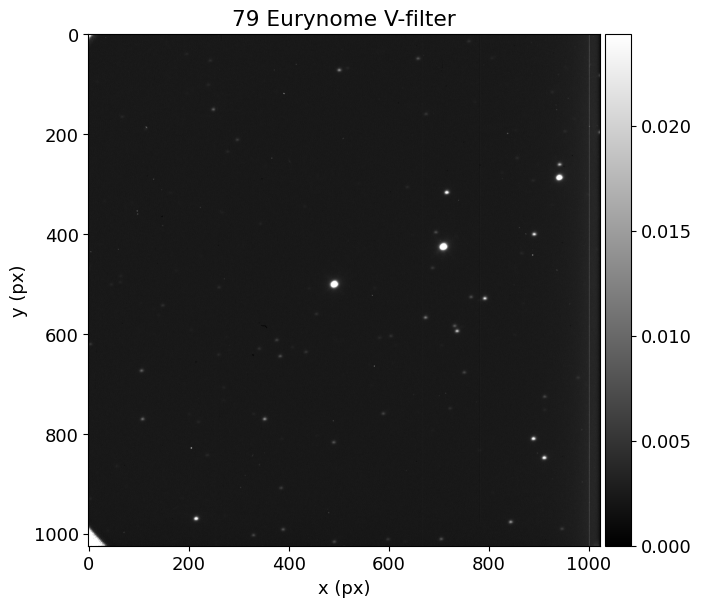

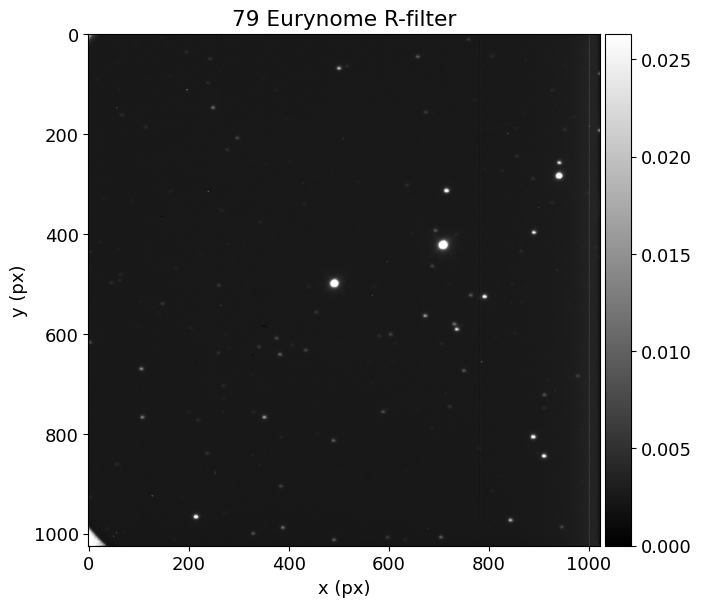

In [10]:
fig4, ax4 = plt.subplots(figsize=[7,7])
fig5, ax5 = plt.subplots(figsize=[7,7])
ut.plot_im(ax4, VEury, cmap=cdef, title='79 Eurynome V-filter', vmax=10*np.median(VEury))
ut.plot_im(ax5, REury, cmap=cdef, title='79 Eurynome R-filter', vmax=10*np.median(REury))


## 2. Comparison With Digital Sky Survey
### 2a. Choose Science Frame and Compare with USNO B-1 Star Catalog

In [11]:
# Choose one of the above frames to analyze
chosen_frame = REury
chosen_file = R16Eury[0][-10:]

In [30]:
# Set magnitude limit and x & y fov and the plate scale
magnitude_limit = 15
fov_width = '6.3m'
fov_height = '6.3m'
plate_scale = 0.184 * 2  # as/px, x2 binning

In [31]:
# set the RA and DEC using sky_query
ra_cat, dec_cat = ut.sky_query(df, chosen_file, fov_width, fov_height, plate_scale, magnitude_limit)

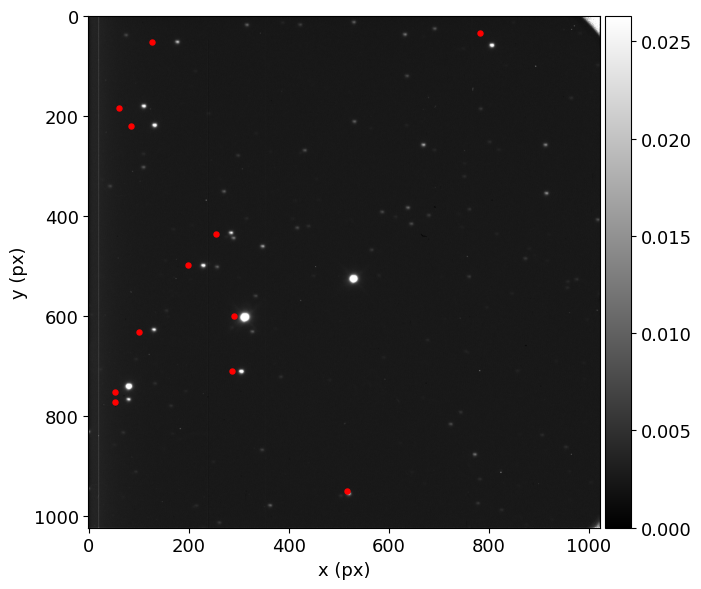

In [32]:
# step through each row, col backwards to effectively rotate by 180 deg
rotated_frame = chosen_frame[::-1, ::-1]
fig6, ax6 = plt.subplots(figsize=[7, 7])
ut.plot_im(ax6, rotated_frame, cmap='gray', vmax=10 * np.median(chosen_frame))
ax6.scatter(ra_cat, dec_cat, c='r', s=13)

### 2b. Measure the Positions of Stars in the CCD Image

In [33]:
# Find the centroids of stars in the image as well as their intensities
ident_star_locs, star_intensities = ut.find_star_centroids(rotated_frame, threshold=0.025)
print(np.shape(ident_star_locs))
print(ident_star_locs[9])
print(star_intensities[9]) # Asteroid is located at index 8

(18, 2)
(np.float64(524.6595775753633), np.float64(530.8618304762555))
24.293923167965158


In [34]:
# Set the coordinates of 79 Eurynome
asteroid_centroid = ident_star_locs[9]
asteroid_intensity = star_intensities[9]

# Readjust the star centroids without the asteroid location
star_centroids = np.delete(ident_star_locs, 9, axis=0)
star_intensities = np.delete(star_intensities, 9, axis=0)

/var/folders/85/g1dhcfl16zj89wp16k8k6bym0000gn/T/ipykernel_84743/958008561.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig7.show()


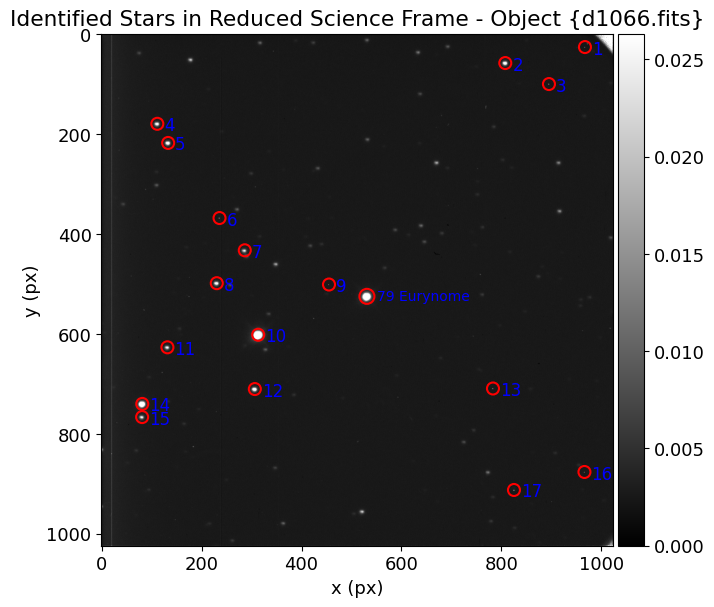

In [35]:
# Plot the Image with the star locator overlay
fig7, ax7 = plt.subplots(figsize = [7, 7])
ut.plot_im(ax7, rotated_frame,title='Identified Stars in Reduced Science Frame - Object {d1066.fits}',vmax = 10*np.median(chosen_frame), cmap=cdef)

# Mark the Stars in the CCD image with circles and label them starting in the top right with 1
for i, (y, x) in enumerate(star_centroids, start=1):
    # set radius
    r = 12

    # make circle patch
    circ = patches.Circle((x, y), radius=r, edgecolor='red', facecolor='none', lw=1.5)

    # apply patch
    ax7.add_patch(circ)

    # add label
    ax7.text(x + r+2, y + r+2, str(i), color='blue', fontsize=12)

# Plot Asteroid Location
x = asteroid_centroid[1]
y = asteroid_centroid[0]

circ = patches.Circle((x, y), radius=15, edgecolor='red', facecolor='none', lw=1.5)
ax7.add_patch(circ)
ax7.text(x + r+8, y + r-4, '79 Eurynome', color='blue', fontsize=10)

fig7.show()

### 2c. Cross-Correlate Stars in Image With USNO B-1 Catalog

/var/folders/85/g1dhcfl16zj89wp16k8k6bym0000gn/T/ipykernel_84743/3788288778.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig8.show()


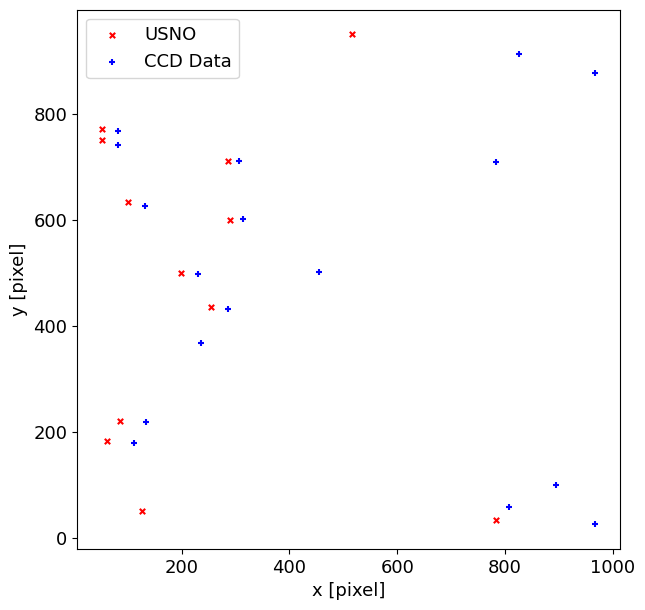

In [40]:
fig8, ax8 = plt.subplots(figsize=[7, 7])

y = star_centroids[:, 0]
x = star_centroids[:, 1]

ax8.scatter(ra_cat, dec_cat, c='r', s=15, marker='x', label='USNO')
ax8.scatter(x, y, c='blue', s=15, marker='+', label='CCD Data')
ax8.set_xlabel('x [pixel]')
ax8.set_ylabel('y [pixel]')
ax8.legend()

fig8.show()